In [3]:
# This NoteBook will perform best model selection for Random Forest Algorithm. 

In [116]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mglearn
from sklearn.metrics import roc_auc_score
from IPython.display import display
from sklearn.model_selection import GridSearchCV

In [5]:
# Read in the dataset
mob = pd.read_csv("Datasets/MobileData.csv")

In [6]:
# Glimpse into the object types
print("Object types: \n{}".format(mob.dtypes))

# This dataset is fully numeric. We have a mixture of float and integer dtypes

Object types: 
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [7]:
# We now inspect whether there are any NA values

na_lst = mob.isna().sum()
null_lst = mob.isnull().sum()

In [8]:
print("Number of NA values: \n{}".format(na_lst))

Number of NA values: 
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [9]:
print("Number of NULL values: \n{}".format(null_lst))

Number of NULL values: 
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [10]:
# Glimpse 
mob.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
# Target: price_range
mob.price_range.describe()
# Target variable with value of 0(low cost), 1(medium cost), 2(high cost), 3(very high cost)

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

In [12]:
# Use: Functions that return minimum and maximum values inside a vector.
# Input: This function is intended to process a vector in this particular case. But it can also accept lists.
# Output: Maximum or maximum value for that vector, depending on the function.
def find_max(vec):
    vmax = 0
    for ele in vec:
        if ele > vmax:
            vmax = ele
    return vmax

def find_min(vec):
    vmin = 1998 # It can be improved with int_max but this function is specific for this dataset only.
    for ele in vec:
        if ele < vmin:
            vmin = ele
    return vmin

In [13]:
# Let's separate the data into the appropriate price ranges and inspect descriptive stats 

low_cost = mob[mob['price_range'] == 0]
medium_cost = mob[mob['price_range'] == 1]
high_cost = mob[mob['price_range'] == 2]
veryhi_cost = mob[mob['price_range'] == 3]

In [14]:
def mean(data):
    means = []
    for variable in data.columns:
        total = sum(data[variable]) 
        
        mean = total/len(data)
        means.append(mean)
    
    return means

In [15]:
row_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
col_names = ["Low Cost", "Medium Cost", "High Cost", "Very High Cost"]
m_lc = mean(low_cost)
m_mc = mean(medium_cost)
m_hc = mean(high_cost)
m_vhc = mean(veryhi_cost)

unified = [m_lc,m_mc, m_hc, m_vhc]

def filler(unified):
    means = []
    for i in unified:
        means.append(i)
    
    return means

means = filler(unified)
means_df = pd.DataFrame(data=means)
means_trans = means_df.transpose()

means_trans.columns = col_names
means_trans.index = row_names

means_trans['Max'] = means_trans.apply(lambda x: x.argmax(), axis=1)
print(means_trans)

                Low Cost  Medium Cost  High Cost  Very High Cost  Max
battery_power  1116.9020    1228.8680  1228.3200       1379.9840    3
blue              0.4860       0.4900     0.4860          0.5180    3
clock_speed       1.5502       1.4886     1.5298          1.5204    0
dual_sim          0.5000       0.5100     0.4980          0.5300    3
fc                4.0840       4.3400     4.4980          4.3160    2
four_g            0.5180       0.5240     0.4940          0.5500    3
int_memory       31.1740      32.1160    30.9200         33.9760    3
m_dep             0.4902       0.5240     0.4908          0.5020    1
mobile_wt       140.5520     140.5100   143.6140        136.3200    2
n_cores           4.6000       4.2980     4.6820          4.5020    2
pc                9.5740       9.9240    10.0180         10.1500    3
px_height       536.4080     666.8920   632.2840        744.8480    3
px_width       1150.2700    1251.9080  1234.0460       1369.8380    3
ram             785.

In [16]:
lc_best = means_trans.index[means_trans['Max'] == 0]
mc_best = means_trans.index[means_trans['Max'] == 1]
hc_best = means_trans.index[means_trans['Max'] == 2]
vhc_best = means_trans.index[means_trans['Max'] == 3]

lc_best = ['clock_speed', 'touch_screen']
mc_best = ['m_dep', 'talk_time']
hc_best = ['fc', 'mobile_wt', 'n_cores', 'three_g']
vhc_best = ['battery_power', 'blue', 'dual_sim', 'four_g', 'int_memory', 'pc',
            'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'wifi']

perf_summary = pd.DataFrame(data=[lc_best, mc_best, hc_best, vhc_best]).transpose()
perf_summary.columns = col_names
print(perf_summary)

#print("Highest mean specification per category: \n Low Cost: \n{} \n Medium Cost: \n{} \n High Cost: \n{} \n Very High Cost: \n{}".format(lc_best, mc_best, hc_best, vhc_best))

        Low Cost Medium Cost  High Cost Very High Cost
0    clock_speed       m_dep         fc  battery_power
1   touch_screen   talk_time  mobile_wt           blue
2           None        None    n_cores       dual_sim
3           None        None    three_g         four_g
4           None        None       None     int_memory
5           None        None       None             pc
6           None        None       None      px_height
7           None        None       None       px_width
8           None        None       None            ram
9           None        None       None           sc_h
10          None        None       None           sc_w
11          None        None       None           wifi


Text(0.5, 1.0, 'Mobile Price Range')

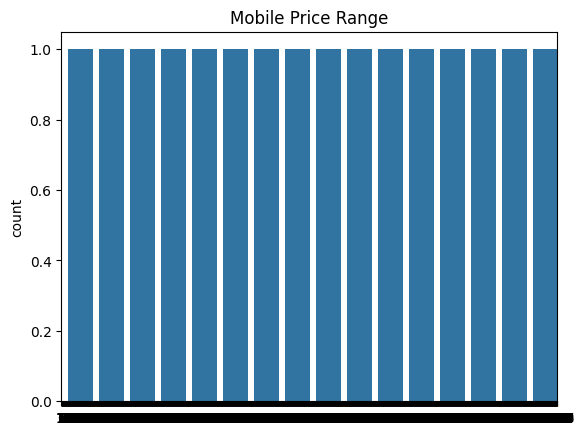

In [17]:
# Let's investigate the how many observations belong to each group
mob['price_range'].value_counts()
sns.countplot(mob['price_range'])
plt.title('Mobile Price Range')

Text(0.5, 1.0, 'Number of cores')

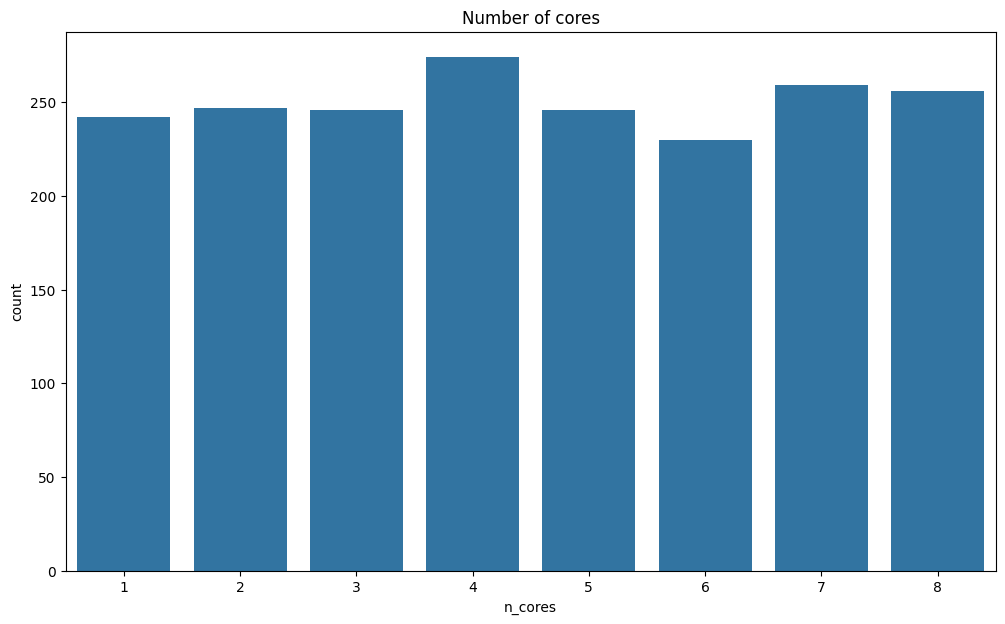

In [18]:
# We can also inspect the other variable such as n_cores
plt.figure(figsize=(12,7))
sns.countplot(data=mob, x='n_cores')
plt.title("Number of cores")

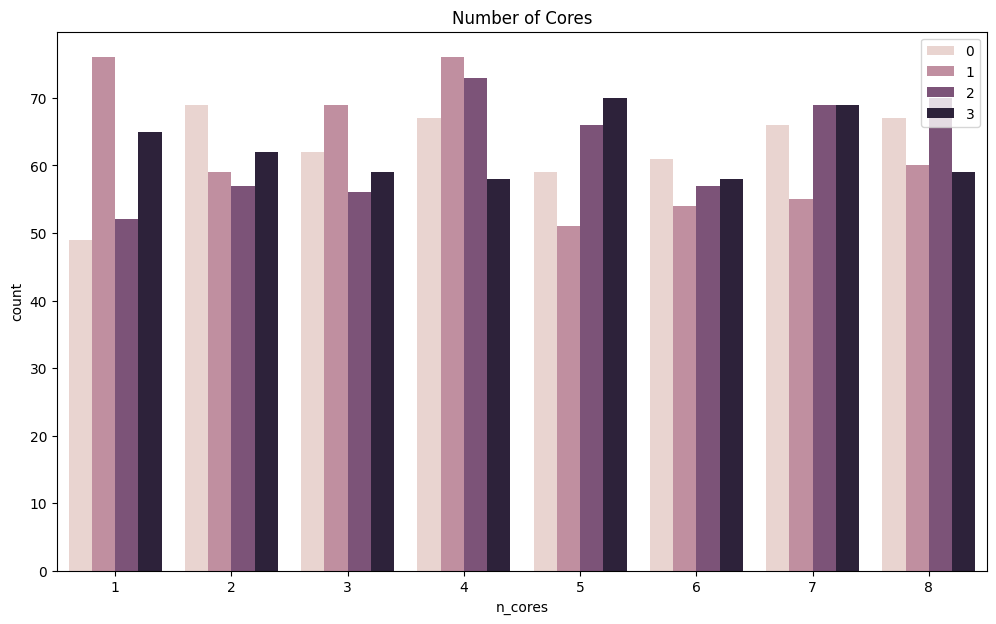

In [19]:
plt.figure(figsize=(12, 7))
sns.countplot(data=mob,x='n_cores',hue='price_range')
plt.title("Number of Cores")
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Distribution of Mobile Weight')

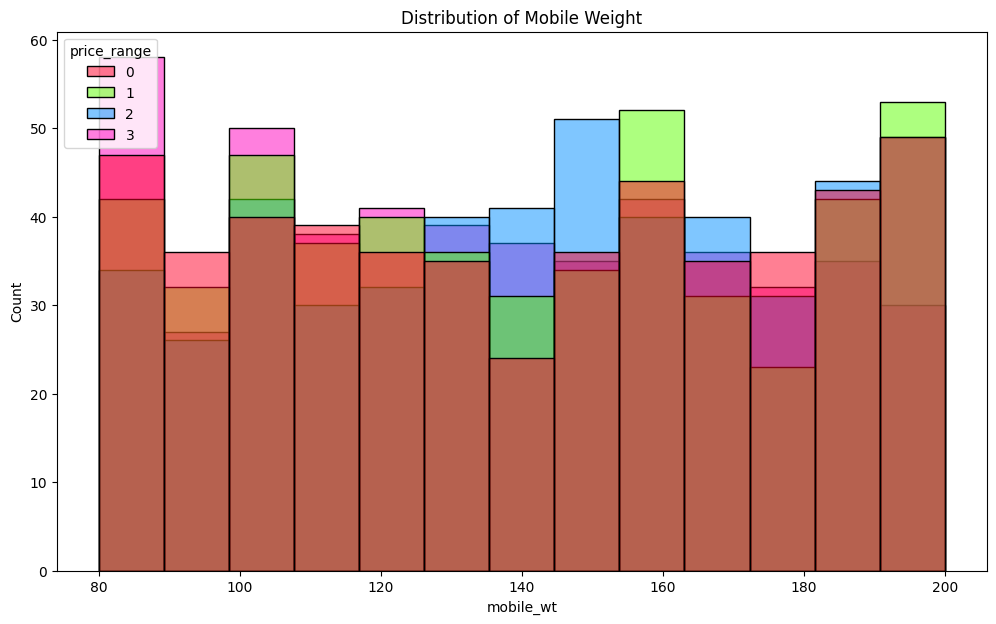

In [20]:
# Let's explore the distribution of features.
plt.figure(figsize=(12,7))
sns.histplot(data=mob, x="mobile_wt",palette = 'gist_rainbow', hue='price_range')
plt.title("Distribution of Mobile Weight")

Text(0.0, 1.0, 'Price Range')

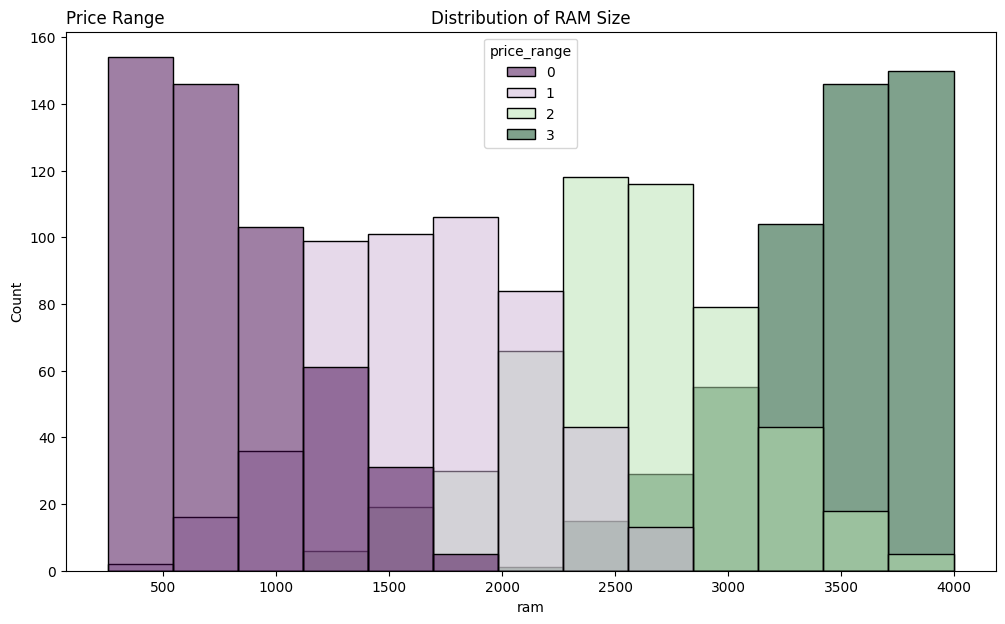

In [21]:
plt.figure(figsize=(12,7))
sns.histplot(data=mob, x="ram",palette="PRGn",hue='price_range')
plt.title("Distribution of RAM Size")
plt.title(loc='left',label="Price Range")

In [22]:
# Let's separate categorical variables now.

# Function:
# Use: This function finds categorical variables in mobile dataset and stores them into a list.
# Input: This function requires a mobile dataset, or any other similar dataset.
# Output: The function returns a list of categorical variables (MAX = 1 (TRUE), MIN = 0 (FALSE)).

def find_categoricals(data):
    categoricals = []
    for variable in data.columns:
            if find_max(data[variable]) == 1 and min(data[variable]) == 0:
                categoricals.append(variable) 
    return categoricals

In [23]:
categoricals = find_categoricals(mob)
print(categoricals)

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


In [24]:
# Now let's separate numerical and categorical variables

In [25]:
# Numerical
numerical_variables = mob.drop(categoricals, axis=1)
# Check
print("Numerical variables: \n{}".format(numerical_variables.columns))
print("\nSize: \n{}".format(numerical_variables.columns.size))

Numerical variables: 
Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

Size: 
15


In [26]:
# Categorical
categorical_variables = mob.drop(numerical_variables, axis=1)
# Check
print("Numerical variables: \n{}".format(categorical_variables.columns))
print("\nSize: \n{}".format(categorical_variables.columns.size))

Numerical variables: 
Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], dtype='object')

Size: 
6


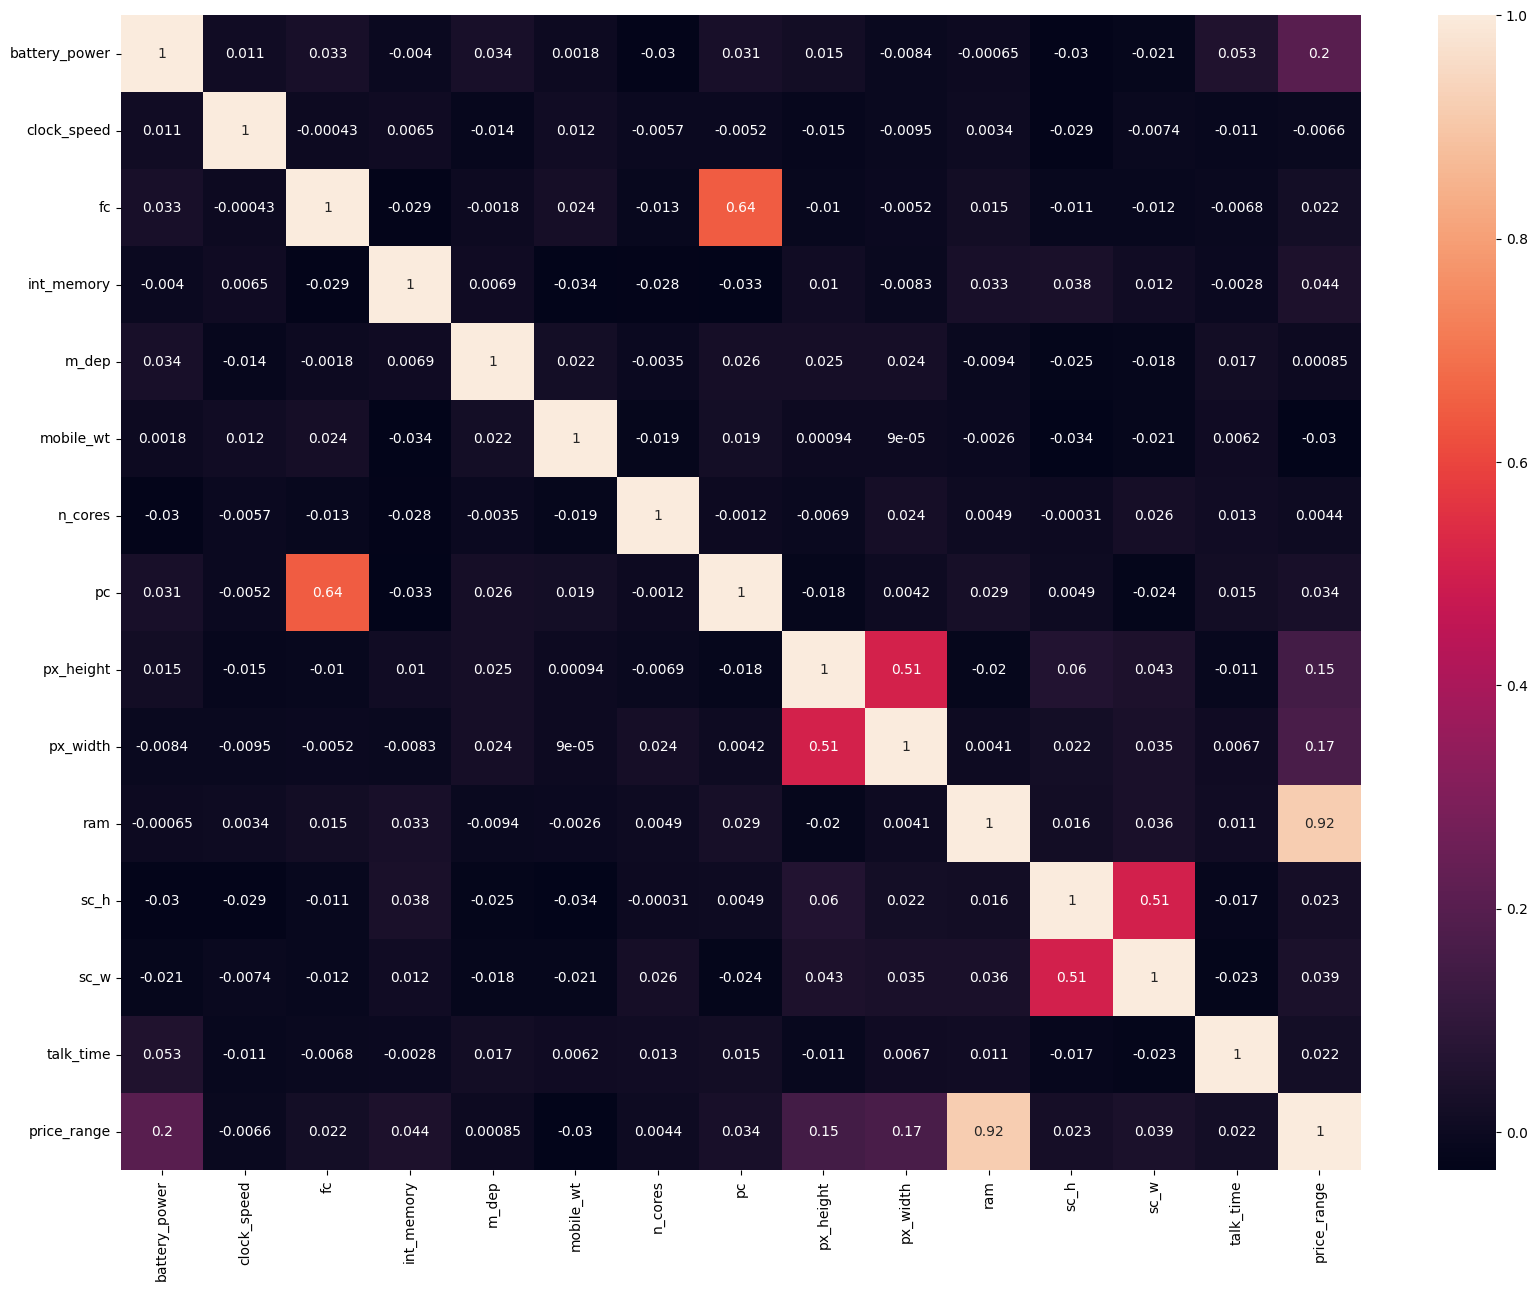

In [27]:
# Let's display a correlation plot of our numerical variables
plt.figure(figsize=(20, 15))

ax = sns.heatmap(numerical_variables.corr(), annot=True)
# High correlations:
#  fc x pc = 0.64 correlation = FIX: Leave as is since they are separate features
#  px_height x px_width = 0.51 correlation = FIX: COMBINE - IMAGE RESOLUTION HxW
#  sc_h x sc_width = 0.51 correlation = FIX: COMBINE - PHONE AREA OR SIZE
# price_range x ram = 0.92 correlation FIX: KEEP, target and prediction correlation is a good thing 

In [28]:
# Addressing Collinearity

In [29]:
# px_height x px_width = image resolution
# We assume that all phones are a rectangle so we apply A = L * W
mob['img_res'] = mob['px_height'] * mob['px_width']

In [30]:
# Use: This function converts centimeters to inches
# Input: A floating-point number in cm.
# Output: A floating-point number in inches
def inch_converter(cm):
     inches = (cm / 2.54)
     inches = round(inches, ndigits=4)
     return inches

In [31]:
# sc_h x sc_w = screen size
# We create a new variable screen_size in inches so we have to convert cm to inch
# We apply A = L * W  assuming all phones have a rectangular shape.
mob['screen_size'] = mob['sc_h'] * mob['sc_w']
mob['screen_size'] = inch_converter(mob['screen_size'])

In [32]:
# We drop the leftover columns
to_remove = ['sc_h', 'sc_w', 'px_height', 'px_width']
mob = mob.drop(labels=to_remove, axis=1)
print(mob.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'img_res',
       'screen_size'],
      dtype='object')


In [33]:
# Let's update our numerical_variables set
numerical_variables = mob.drop(labels=categoricals, axis=1)

print(numerical_variables.columns)

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time', 'price_range',
       'img_res', 'screen_size'],
      dtype='object')


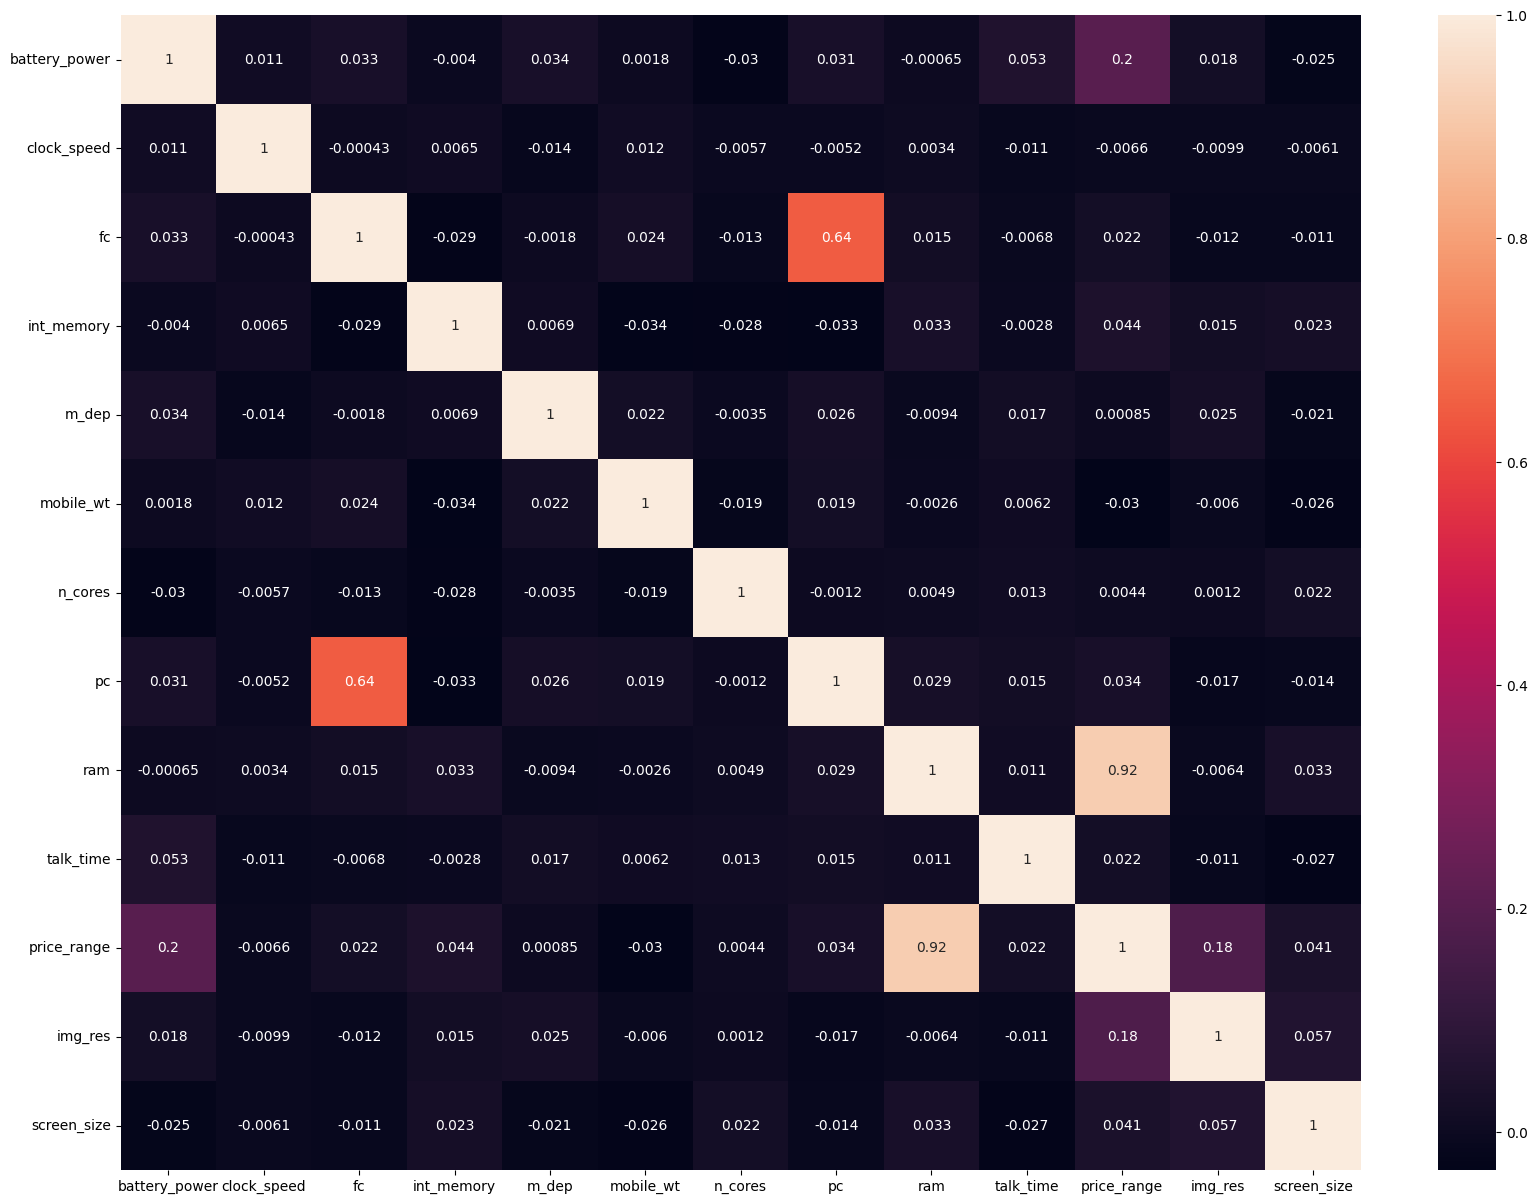

In [34]:
# Let's replot the corrmatrix

plt.figure(figsize=(20, 15))
ax = sns.heatmap(numerical_variables.corr(), annot=True)

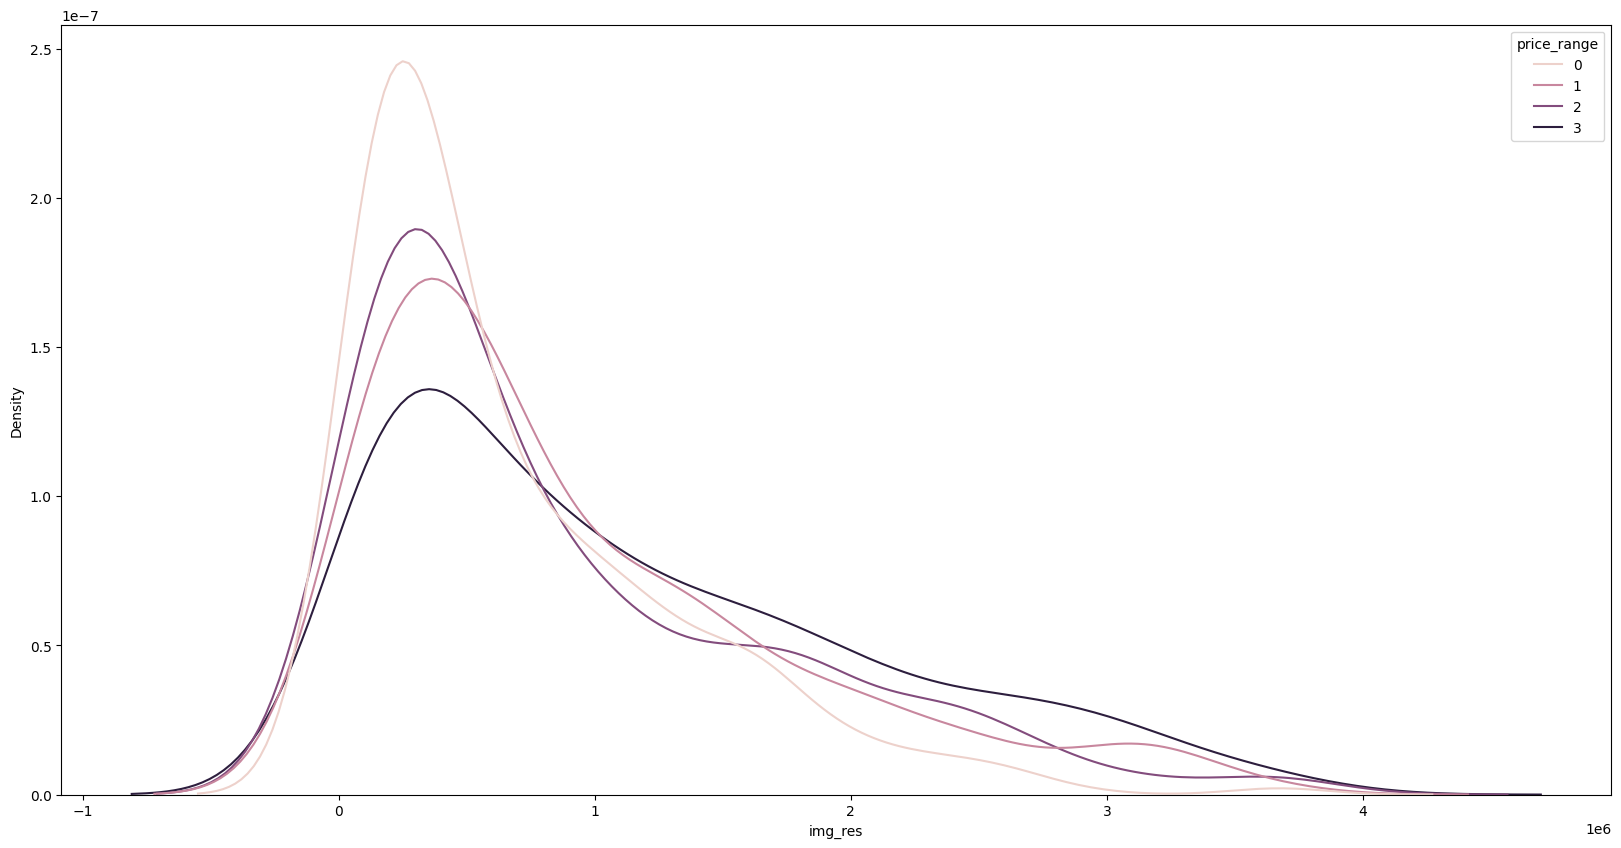

In [40]:
plt.figure(figsize=(20, 10))
sns.kdeplot(data=mob, x = 'img_res', hue="price_range")
plt.show()

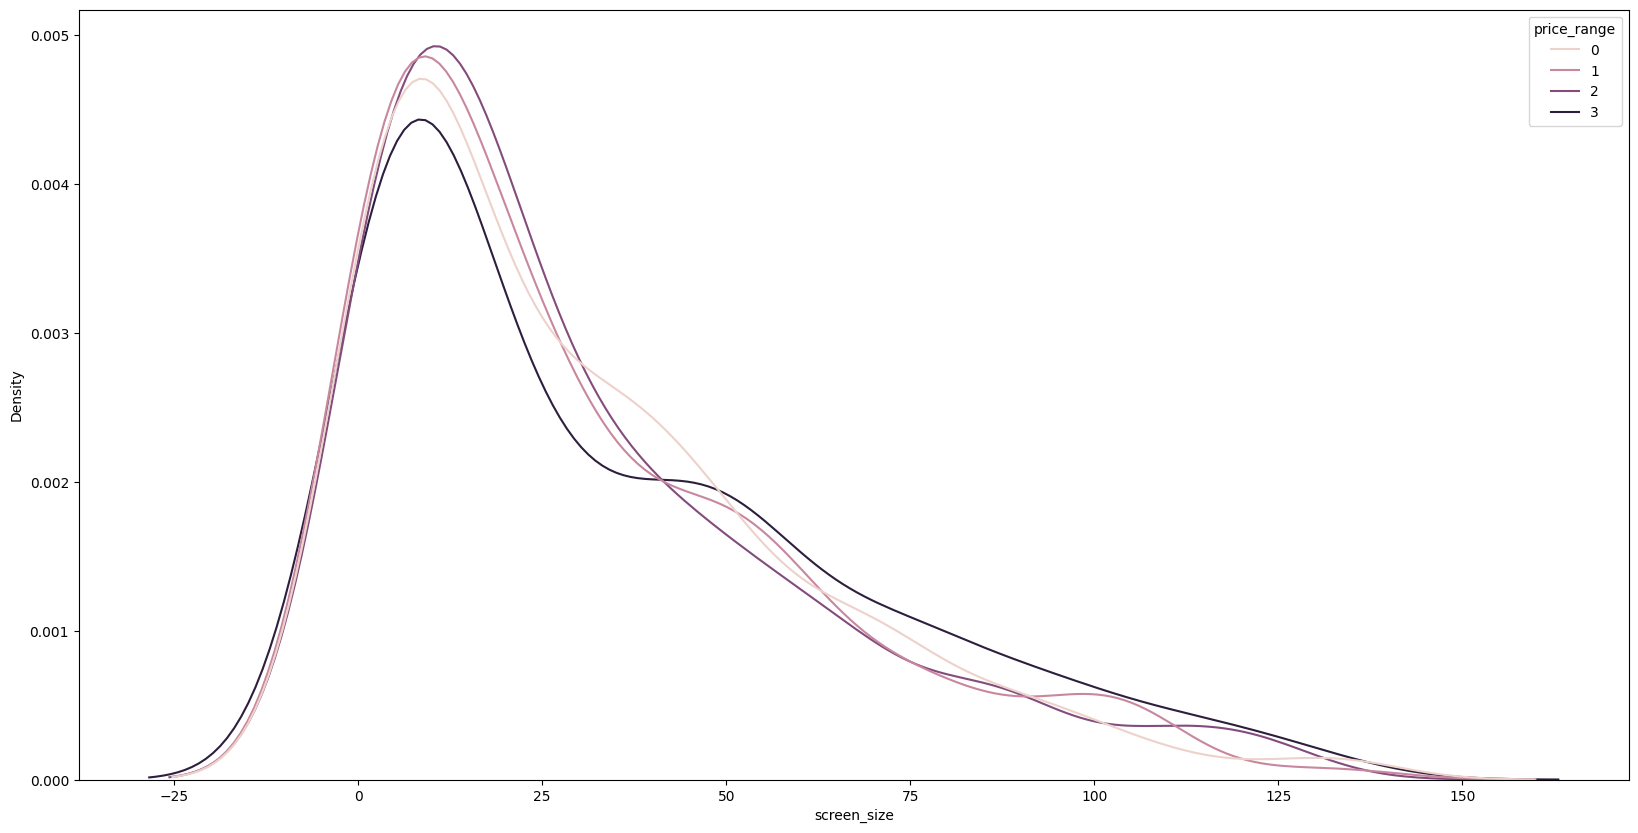

In [39]:
plt.figure(figsize=(20, 10))
sns.kdeplot(data=mob, x = 'screen_size', hue='price_range')
plt.show()

In [44]:
categoricals

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [ ]:
# Categorical Variables

In [51]:
# bluetooth

prop_table = pd.crosstab(mob['price_range'], mob['blue'], normalize='index')
print(prop_table)

blue             0      1
price_range              
0            0.514  0.486
1            0.510  0.490
2            0.514  0.486
3            0.482  0.518


In [ ]:
# Dual Sim
prop_table = pd.crosstab(mob['price_range'], mob['dual_sim'], normalize='index')
print(prop_table)

dual_sim         0      1
price_range              
0            0.500  0.500
1            0.490  0.510
2            0.502  0.498
3            0.470  0.530


In [ ]:
# Four G
prop_table = pd.crosstab(mob['price_range'], mob['four_g'], normalize='index')
print(prop_table)

four_g           0      1
price_range              
0            0.482  0.518
1            0.476  0.524
2            0.506  0.494
3            0.450  0.550


In [49]:
# Three G
prop_table = pd.crosstab(mob['price_range'], mob['three_g'], normalize='index')
print(prop_table)

three_g          0      1
price_range              
0            0.254  0.746
1            0.244  0.756
2            0.226  0.774
3            0.230  0.770


In [52]:
# Touch Screen
prop_table = pd.crosstab(mob['price_range'], mob['touch_screen'], normalize='index')
print(prop_table)

touch_screen      0      1
price_range               
0             0.476  0.524
1             0.478  0.522
2             0.530  0.470
3             0.504  0.496


In [53]:
# Wi-Fi
prop_table = pd.crosstab(mob['price_range'], mob['wifi'], normalize='index')
print(prop_table)

wifi             0      1
price_range              
0            0.504  0.496
1            0.496  0.504
2            0.496  0.504
3            0.476  0.524


In [ ]:
# Conclusion:
# The prop tables tell us that variable 'three_g' has most impact on the price range.
# This is most likely the only variable worth including in our model.

In [ ]:
# Modeling

In [55]:
print("Shape of MOB Dataset: \n{}".format(mob.shape))

Shape of MOB Dataset: 
(2000, 19)


In [57]:
mob.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'img_res',
       'screen_size'],
      dtype='object')

In [66]:
# Defining X and y
y = mob['price_range']
X_vec = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'n_cores',
         'pc', 'img_res', 'ram', 'screen_size', 'three_g']
X = mob[X_vec]

print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (2000, 11)
Shape of y: (2000,)


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))

print("\nShape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (1600, 11)
Shape of y_train: (1600,)

Shape of X_test: (400, 11)
Shape of y_test: (400,)


In [93]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

rfc.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [94]:
print("Performance on train set: {: .2f}".format(rfc.score(X_train, y_train)))
print("Performance on test set: {: .2f}".format(rfc.score(X_test, y_test)))

Performance on train set:  1.00
Performance on test set:  0.89


In [95]:
print("Trailing underscore: {: .2f}".format(rfc.oob_score_))

Trailing underscore:  0.88


In [ ]:
rfc = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1,random_state=42)
rfc.fit(X_train,y_train)

print("c-stat: {: .2f}".format(roc_auc_score(y_train, rfc.oob_decision_function_, multi_class='ovo')))

c-stat:  0.98


In [106]:
rfc.feature_importances_

array([0.09337568, 0.03015101, 0.02789005, 0.04223055, 0.04472731,
       0.02509282, 0.03041896, 0.08845644, 0.57087914, 0.03956228,
       0.00721577])

<Axes: >

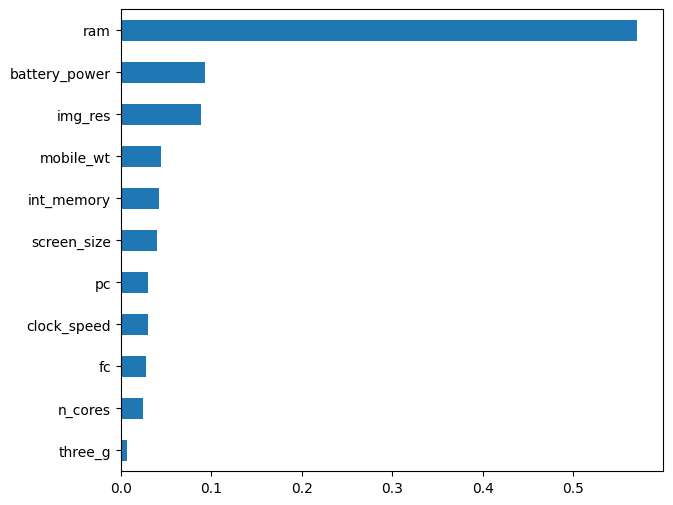

In [108]:
# Showing the importance of all variables
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=True)
feature_importances.plot(kind="barh", figsize=(7, 6))

In [ ]:
# Optimization

In [ ]:
# TBC

In [110]:
# Total number of jobs comparison [1, -1]

for jobs in [1, -1]:
    start = time.perf_counter()

    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs = jobs, random_state=42)

    model.fit(X_train, y_train)

    elapsed = time.perf_counter() - start
    print(f"n_jobs =  {jobs}: {elapsed:.2f} seconds") 

n_jobs =  1: 3.46 seconds
n_jobs =  -1: 2.36 seconds


In [ ]:
# n_estimators


30 trees
C-stat:  0.9663

50 trees
C-stat:  0.9745

100 trees
C-stat:  0.9790

200 trees
C-stat:  0.9810

500 trees
C-stat:  0.9823

1000 trees
C-stat:  0.9833

2000 trees
C-stat:  0.9838

3000 trees
C-stat:  0.9839



<Axes: >

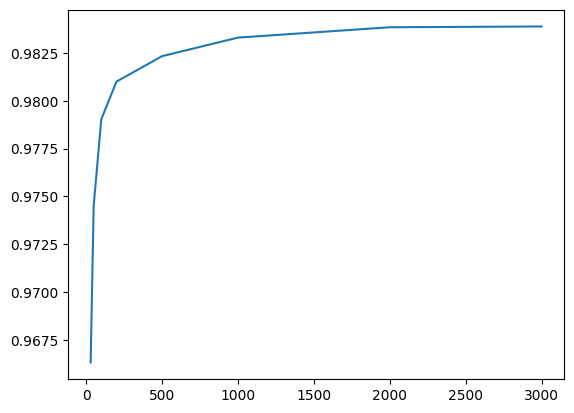

In [111]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000, 3000]

for trees in n_estimator_options:
    model = RandomForestClassifier(n_estimators=trees,oob_score=True,n_jobs=-1,random_state=42)
    
    model.fit(X_train, y_train)
    print(trees, "trees")
    
    roc = roc_auc_score(y_train, model.oob_decision_function_, multi_class='ovo')
    print("C-stat: {: .4f}".format(roc))
    results.append(roc)
    print("")

pd.Series(results, n_estimator_options).plot()

In [ ]:
# Maximum Features

sqrt option
C-stat:  0.9838

log2 option
C-stat:  0.9838

0.9 option
C-stat:  0.9879

0.2 option
C-stat:  0.9781



<Axes: >

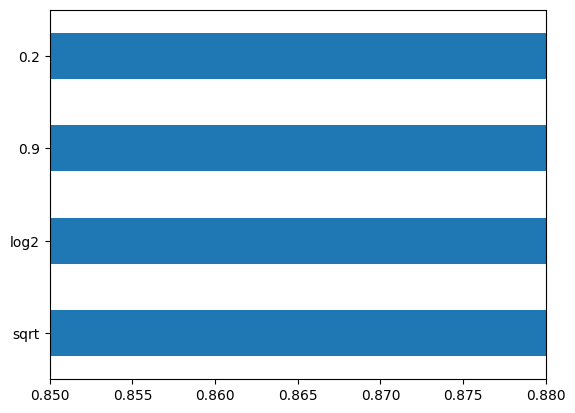

In [112]:
results = []
max_features_options = ["sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=2000, oob_score=True,
                                   n_jobs=-1, random_state=42, 
                                   max_features=max_features)
    
    model.fit(X_train, y_train)
    print(max_features, "option")

    roc = roc_auc_score(y_train, model.oob_decision_function_, multi_class='ovo')
    print("C-stat: {: .4f}".format(roc))

    results.append(roc)
    print("")

pd.Series(results, index=max_features_options).plot(kind="barh", xlim=(.85, .88))

In [ ]:
# Minimum number of leafs

1 min samples
C-stat:  0.9870

2 min samples
C-stat:  0.9874

3 min samples
C-stat:  0.9874

4 min samples
C-stat:  0.9872

5 min samples
C-stat:  0.9869

6 min samples
C-stat:  0.9865

7 min samples
C-stat:  0.9861

8 min samples
C-stat:  0.9856

9 min samples
C-stat:  0.9851

10 min samples
C-stat:  0.9846



<Axes: >

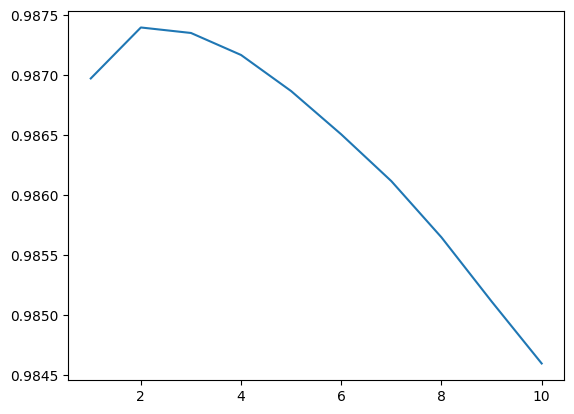

In [113]:
# min_sample_leaf
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=2000, 
                                   oob_score=True,
                                   n_jobs=-1,
                                   max_features=None,
                                   min_samples_leaf=min_samples,
                                   random_state=42
                                   )
    model.fit(X_train, y_train)
    print(min_samples, "min samples")
    
    roc = roc_auc_score(y_train, model.oob_decision_function_, multi_class='ovo')
    print("C-stat: {: .4f}".format(roc))
    results.append(roc)
    print("")

pd.Series(results, min_samples_leaf_options).plot()

In [115]:
model = RandomForestClassifier(
    n_estimators=2000,
    oob_score=True,
    n_jobs=-1,
    max_features=None,
    min_samples_leaf=3
)
model.fit(X_train, y_train)
roc = roc_auc_score(y_train, model.oob_decision_function_, multi_class='ovo')
print("C-stat: {: .4f}".format(roc))

C-stat:  0.9875


In [ ]:
# Verifying the results

In [ ]:
rf_cv = GridSearchCV(estimator=model, 
                     param_grid={'n_estimators': [2000],
                                 'n_jobs': [-1],
                                 'max_features': [None],
                                 'min_samples_leaf': [3]},
                     scoring='roc_auc_ovo', cv=5, refit='f1')

rf_cv.fit(X_train, y_train)

In [129]:
rf_cv.best_score_

np.float64(0.9866507305861003)

In [130]:
# The CV results are very similar to the results we've received from the original
# c-stat code 0.9875 compared to 0.9866. 

# Considering that the train vs test scores are similar and the CV and classic split
# test results are similar we will conclude that we did not overfit and that 
# our model classifies the price_range almost perfectly with a final score 0.9875

In [ ]:
# CV using GridSearchCV
# It takes too long (+35min)probably due to bad parameter such as n_jobs [1, -1], etc...
 # 1. Instantiate the classifier
# rf = RandomForestClassifier(random_state=42)
 # 2. Create a dictionary of hyperparameters to search over.
#cv_params = {'n_jobs': [1, -1], 
#             'n_estimators': [10, 100, 200, 500, 1000, 1500, 2000],
#             'max_features': ["sqrt", "log2", 0.9, 0.2],
#             'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#             }
 # 3. Create a set of scoring metrics to capture
#scoring = {'roc_auc_ovo'}
## 4. Instantiate the GridSearchCV object
#rf_cv = GridSearchCV(rf, param_grid=cv_params, scoring='roc_auc_ovo', cv=5, refit='f1')
 # 5. Fit the data
#rf_cv.fit(X_train, y_train)